In [86]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import nltk  
nltk.download("stopwords")
stopwords = set(STOPWORDS)

import seaborn as sns

df = pd.read_csv("spam.csv", encoding='latin1')
df.head()



[nltk_data] Error loading stopwords: <urlopen error EOF occurred in
[nltk_data]     violation of protocol (_ssl.c:1002)>


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [87]:
df=df[["v1","v2"]]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [88]:
df=df.rename(columns = {'v1':'label', 'v2': 'messages'})
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [158]:
df["messages"][1]

'ok lar joking wif u oni'

In [90]:
# Explore the data
print("Head of the data:- \n", df.head())
print("Shape of the data:-", df.shape)

Head of the data:- 
   label                                           messages
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Shape of the data:- (5572, 2)


No of tweets which are negative are:-  4825
No of tweets which are negative are:-  747


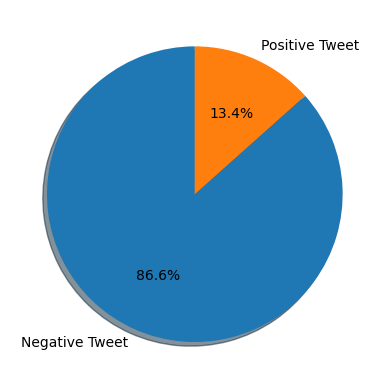

In [91]:
# Visualize data
len_ham = len(df[df["label"] == "ham"])
len_spam = len(df[df["label"] == "spam"])
arr_labels = np.array([len_ham, len_spam])
labels = ["Negative Tweet", "Positive Tweet"]
print("No of tweets which are negative are:- ", len_ham)
print("No of tweets which are negative are:- ", len_spam)

plt.pie(
    arr_labels, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90
)
plt.show()

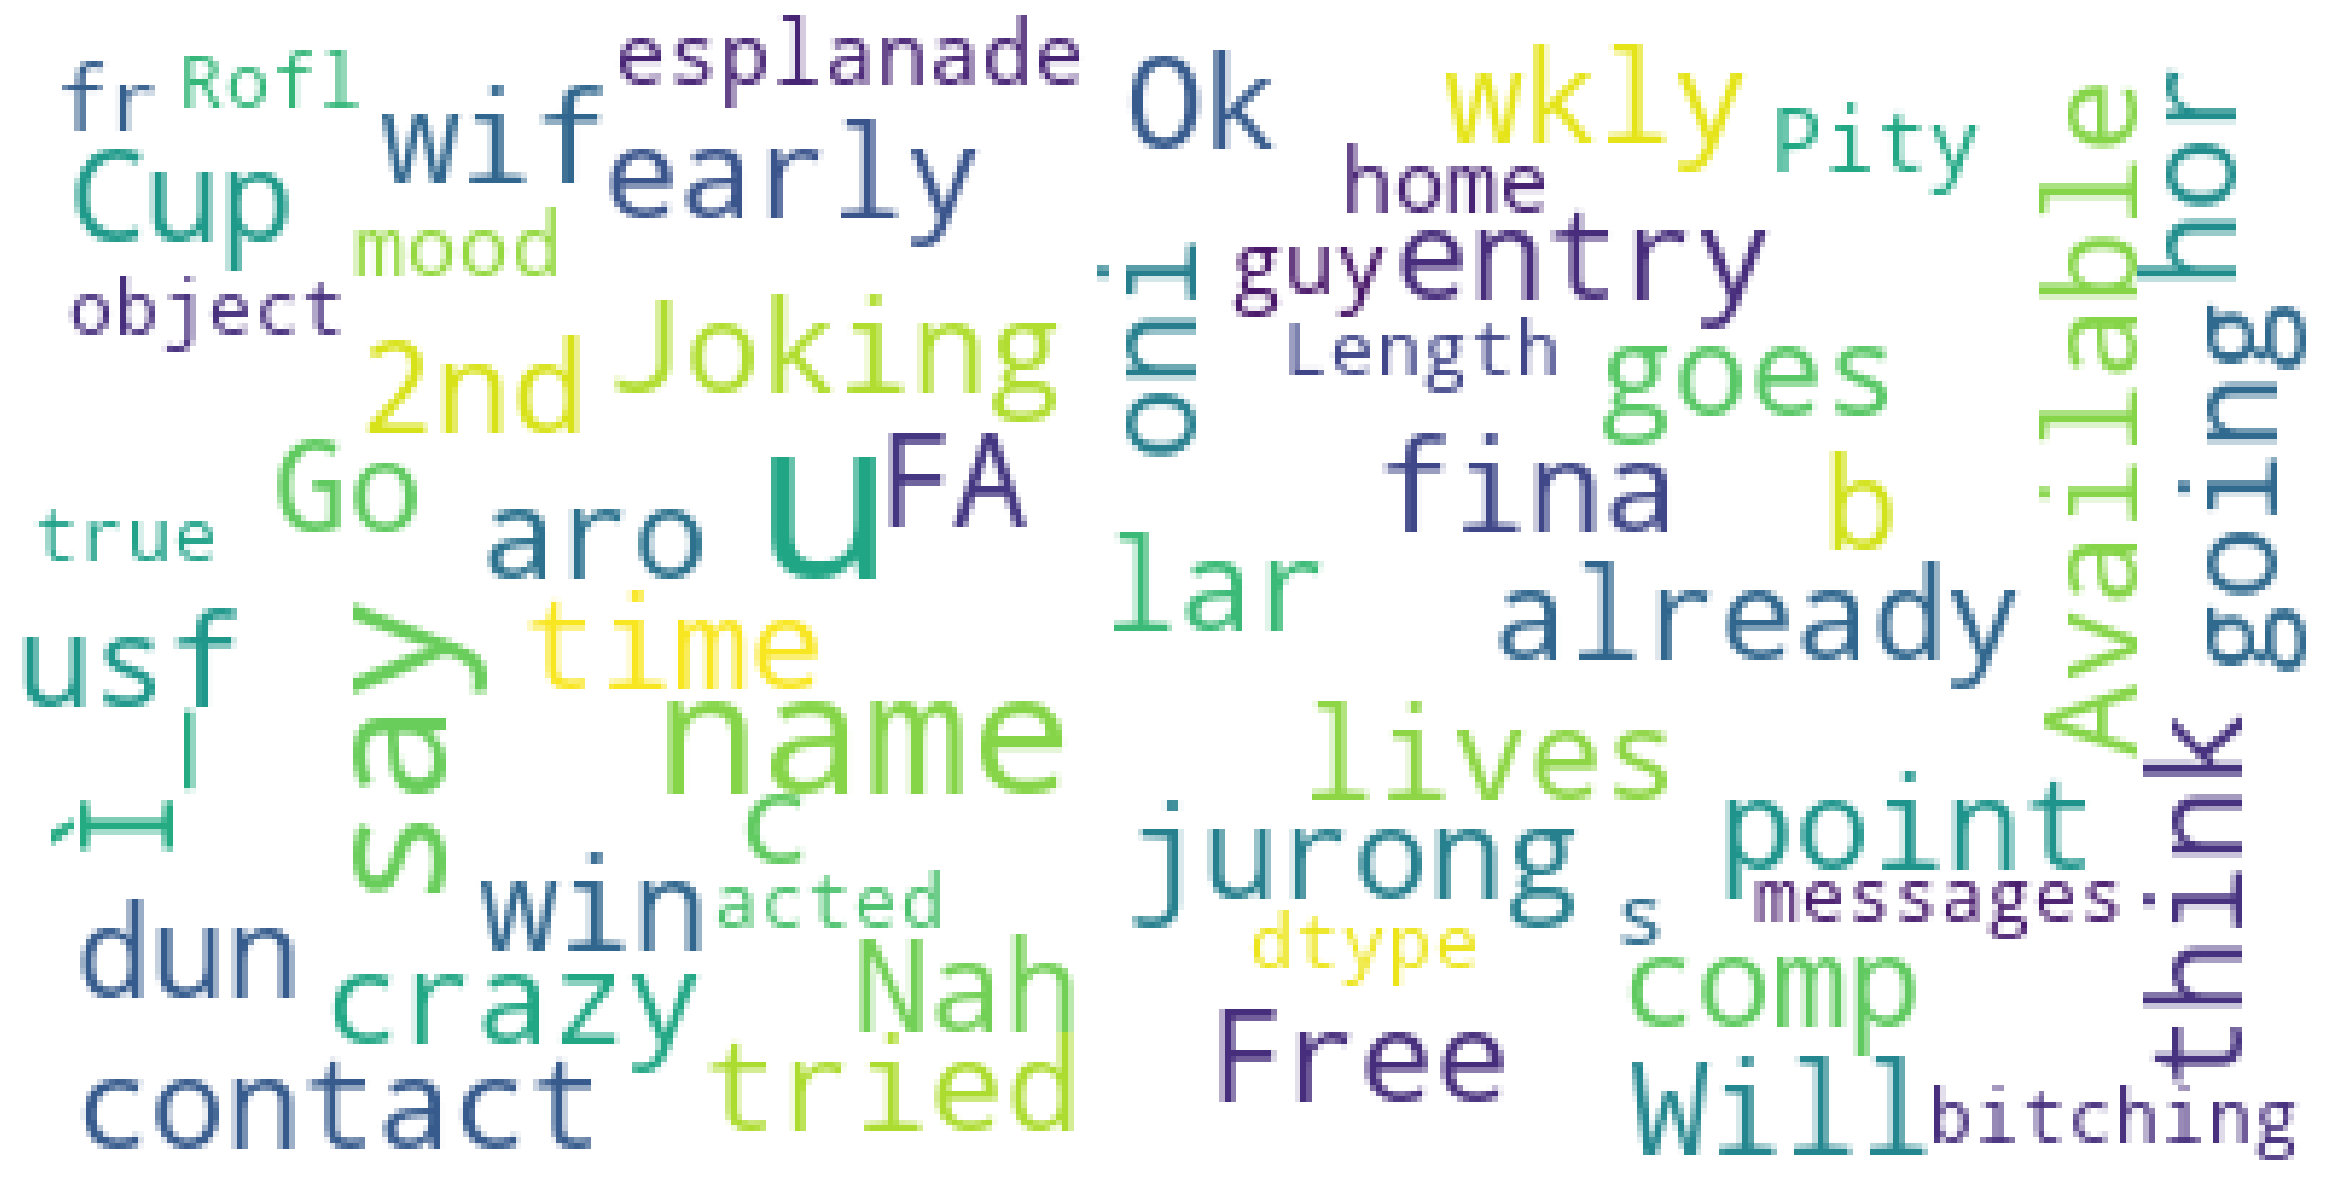

In [92]:
# Show word cloud for all messages
wordcloud = WordCloud(
    background_color="white",
    stopwords=stopwords,
    max_words=200,
    max_font_size=40,
).generate(str(df["messages"]))

plt.figure(figsize=(30, 30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

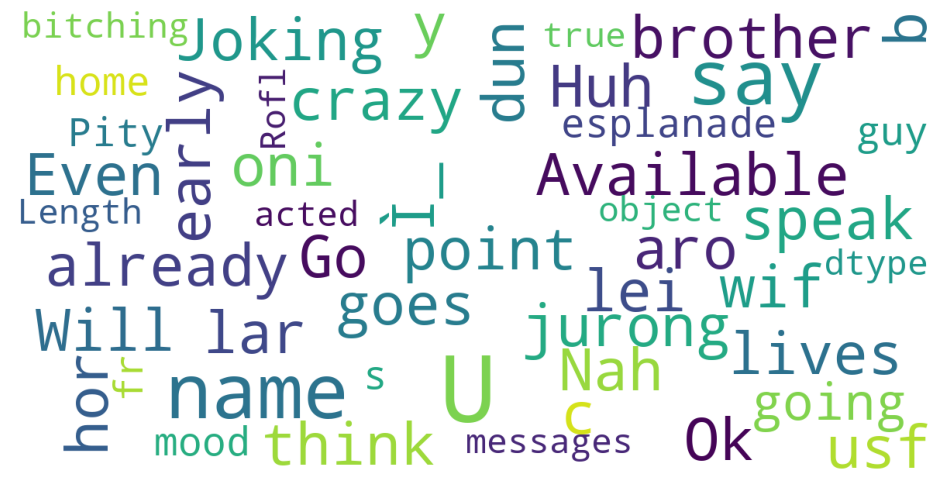

In [93]:
# Show word cloud for specific labels
len_ham_messages = df["messages"][df["label"] == "ham"]
len_spam_messages = df["messages"][df["label"] == "spam"]

wordcloud_true = WordCloud(
    background_color="white",
    stopwords=stopwords,
    max_words=200,
    max_font_size=40,
    scale=3,
    random_state=1,
).generate(str(len_ham_messages))

fig = plt.figure(1, figsize=(12, 12))
plt.axis("off")

plt.imshow(wordcloud_true)
plt.show()



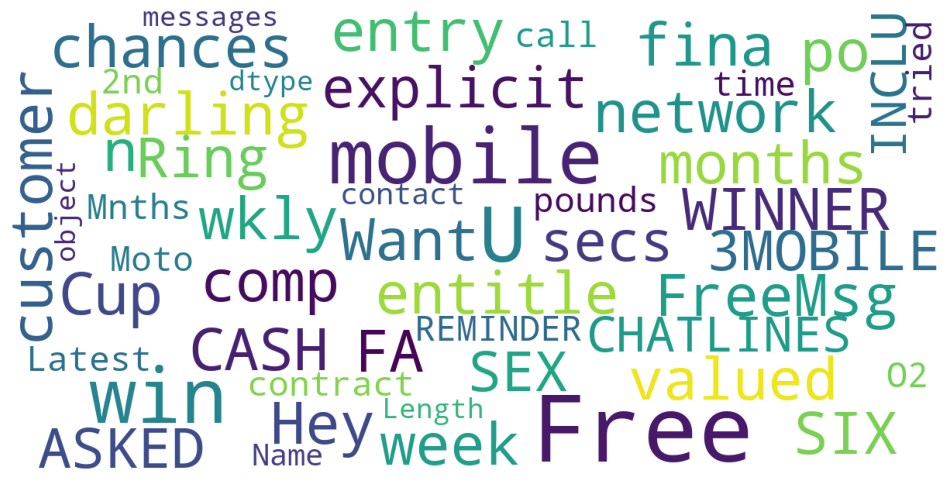

In [94]:
wordcloud_false = WordCloud(
    background_color="white",
    stopwords=stopwords,
    max_words=200,
    max_font_size=40,
    scale=3,
    random_state=1,
).generate(str(len_spam_messages))

fig = plt.figure(1, figsize=(12, 12))
plt.axis("off")

plt.imshow(wordcloud_false)
plt.show()


In [95]:
df["label"] = df.label.map({"ham": 0, "spam": 1})

In [96]:
df.head()

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [97]:
import re  


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [98]:
def preprocess_text(text):
    # function for fully text preprocessing  like removing stop words, punctuations, lemmatization etc.
    text = text.lower()
    text = remove_punctuations(text)
    text = remove_stop_words(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = lemmatize_text(text)
    return text

def remove_punctuations(text):
    # function for removing punctuations
    import string

    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

def remove_stop_words(text):
    from nltk.corpus import stopwords

    stop_words = set(stopwords.words("english"))
    words = text.split()
    words = [w for w in words if not w in stop_words]
    text = " ".join(words)
    return text

def remove_urls(text):
    text = re.sub(r"http\S+", "", text)
    return text

def remove_hashtags(text):
    text = re.sub(r"#\S+", "", text)
    return text

def remove_numbers(text):
    text = re.sub(r"\d+", "", text)
    return text

def stem_text(text):
    stemmer = PorterStemmer()
    text = " ".join([stemmer.stem(word) for word in text.split()])
    return text

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Usage example:
df['messages'] = df['messages'].apply(preprocess_text)


In [99]:
df["messages"][5]

'freemsg hey darling week word back id like fun still tb ok xxx std chgs send å£ rcv'

In [100]:
df.head()

,label,messages
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df["messages"],df["label"],test_size=0.30,random_state=77)

# BAG OF WORDS

In [102]:
from sklearn.feature_extraction.text import CountVectorizer 
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

# TFID

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# I'LL Prefer TIFID

In [104]:
import joblib
# Save the vectorizer to disk
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

# Model Selection

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier




In [106]:
def logistic_regression_model(x_train,y_train):
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(x_train, y_train)
    return log_reg

In [107]:
def Xgboost_model(x_train,y_train):
    n_estimators = [50, 100, 150, 200]
    max_depth = [2, 4, 6, 8]
    learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
    subsample = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
    colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
    min_child_weight = [1, 2, 3, 4, 5]
    gamma = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    params = {
        "n_estimators": n_estimators,
        "max_depth": max_depth,
        "learning_rate": learning_rate,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "min_child_weight": min_child_weight,
        "gamma": gamma,
    }
    xgb = XGBClassifier()
    clf = RandomizedSearchCV(xgb, params, cv=5, n_jobs=-1)
    clf.fit(x_train,y_train)
    return clf

In [108]:
def svm_model(x_train,y_train):  
    C = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    gamma = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    params = {
        "C": C,
        "gamma": gamma
    }
    svm = SVC(probability=True)
    clf = RandomizedSearchCV(svm, params, cv=5, n_jobs=-1)
    clf.fit(x_train,y_train)
    return clf

In [109]:
def random_forest_model(x_train,y_train):
    n_estimators = [50, 100, 150, 200]
    max_depth = [2, 4, 6, 8]
    params = {
        "n_estimators": n_estimators,
        "max_depth": max_depth,
    }
    rf = RandomForestClassifier()
    clf = RandomizedSearchCV(rf, params, cv=5, n_jobs=-1)
    clf.fit(x_train, y_train)
    return clf



In [110]:
def Naive_Bayes(x_train,y_train):
    nb_model = MultinomialNB()
    nb_model.fit(x_train,y_train)
    return nb_model



In [111]:
def KNN_model(x_train,y_train): 
    n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    weights = ['uniform', 'distance']
    algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
    leaf_size = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    p = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    params = {
        "n_neighbors": n_neighbors,
        "weights": weights,
        "algorithm": algorithm,
        "leaf_size": leaf_size,
        "p": p,
    }
    knn = KNeighborsClassifier()
    clf = RandomizedSearchCV(knn, params, cv=5, n_jobs=-1)
    clf.fit(x_train,y_train)
    return clf

In [112]:
lr=logistic_regression_model(X_train,y_train)


In [113]:
xgb=Xgboost_model(X_train,y_train)


In [114]:
svm=svm_model(X_train,y_train)


In [115]:
rf=random_forest_model(X_train,y_train)


In [116]:
nb=Naive_Bayes(X_train,y_train)


In [117]:
knn=KNN_model(X_train,y_train)

/Users/asthamishra/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/Users/asthamishra/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/Users/asthamishra/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/Users/asthamishra/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_base.py:564: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/Users/asthamishra/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_base.py:564

In [118]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    log_loss,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.metrics import roc_curve, roc_auc_score




In [119]:
y_pred_lr = lr.predict(X_test)

In [120]:
y_pred_xgb = xgb.predict(X_test)

In [121]:
y_pred_svm = svm.predict(X_test)

In [122]:
y_pred_rf = rf.predict(X_test)

In [123]:
y_pred_nb = nb.predict(X_test)

In [124]:
y_pred_knn = knn.predict(X_test)

In [125]:
y_pred_proba_lr = lr.predict_proba(X_test)

In [126]:
y_pred_proba_xgb = xgb.predict_proba(X_test)

In [127]:
y_pred_proba_svm = svm.predict_proba(X_test)

In [128]:
y_pred_proba_rf = rf.predict_proba(X_test)

In [129]:
y_pred_proba_nb = nb.predict_proba(X_test)

In [130]:
y_pred_proba_knn = knn.predict_proba(X_test)

In [131]:
def evaluate_model(y_test,y_pred,y_pred_proba):
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred))
    print("Precision Score:- ", precision_score(y_test, y_pred,zero_division=1))
    print("Recall Score:- ", recall_score(y_test, y_pred))
    print("F1 Score:- ", f1_score(y_test, y_pred))
    print("Log Loss:- ", log_loss(y_test,y_pred_proba))

In [132]:
evaluate_model(y_test,y_pred_lr,y_pred_proba_lr)

Accuracy Score:-  0.9593301435406698
Precision Score:-  0.9815950920245399
Recall Score:-  0.7111111111111111
F1 Score:-  0.8247422680412372
Log Loss:-  0.14607895430090934


In [133]:
evaluate_model(y_test,y_pred_xgb,y_pred_proba_xgb)

Accuracy Score:-  0.9617224880382775
Precision Score:-  0.9497206703910615
Recall Score:-  0.7555555555555555
F1 Score:-  0.8415841584158417
Log Loss:-  0.13384227814631652


In [134]:
evaluate_model(y_test,y_pred_svm,y_pred_proba_svm)

Accuracy Score:-  0.9754784688995215
Precision Score:-  0.9893617021276596
Recall Score:-  0.8266666666666667
F1 Score:-  0.9007263922518159
Log Loss:-  0.08474951911454706


In [135]:
evaluate_model(y_test,y_pred_rf,y_pred_proba_rf)

Accuracy Score:-  0.8809808612440191
Precision Score:-  1.0
Recall Score:-  0.11555555555555555
F1 Score:-  0.20717131474103584
Log Loss:-  0.26383113237956907


In [136]:
evaluate_model(y_test,y_pred_nb,y_pred_proba_nb)

Accuracy Score:-  0.9599282296650717
Precision Score:-  1.0
Recall Score:-  0.7022222222222222
F1 Score:-  0.8250652741514359
Log Loss:-  0.12256944210552453


/Users/asthamishra/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [137]:
evaluate_model(y_test,y_pred_knn,y_pred_proba_knn)

Accuracy Score:-  0.916267942583732
Precision Score:-  1.0
Recall Score:-  0.37777777777777777
F1 Score:-  0.5483870967741935
Log Loss:-  2.2495539808145635


In [138]:
def plot_confusion_matrix(test_y, predict_y):
    confusion = confusion_matrix(test_y, predict_y)

    Recall = ((confusion.T) / (confusion.sum(axis=1))).T
    # divide each element of the confusion matrix with the sum of elements in that column

    Precision = confusion / confusion.sum(axis=0)
    # divide each element of the confusion matrix with the sum of elements in that row

    plt.figure(figsize=(20, 4))

    labels = [0, 1]
    cmap = sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(
        confusion,
        annot=True,
        cmap=cmap,
        fmt=".3f",
        xticklabels=labels,
        yticklabels=labels,
    )
    plt.xlabel("Predicted Class")
    plt.ylabel("Original Class")
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(
        Precision,
        annot=True,
        cmap=cmap,
        fmt=".3f",
        xticklabels=labels,
        yticklabels=labels,
    )
    plt.xlabel("Predicted Class")
    plt.ylabel("Original Class")
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    sns.heatmap(
        Recall,
        annot=True,
        cmap=cmap,
        fmt=".3f",
        xticklabels=labels,
        yticklabels=labels,
    )
    plt.xlabel("Predicted Class")
    plt.ylabel("Original Class")
    plt.title("Recall matrix")

    plt.show()



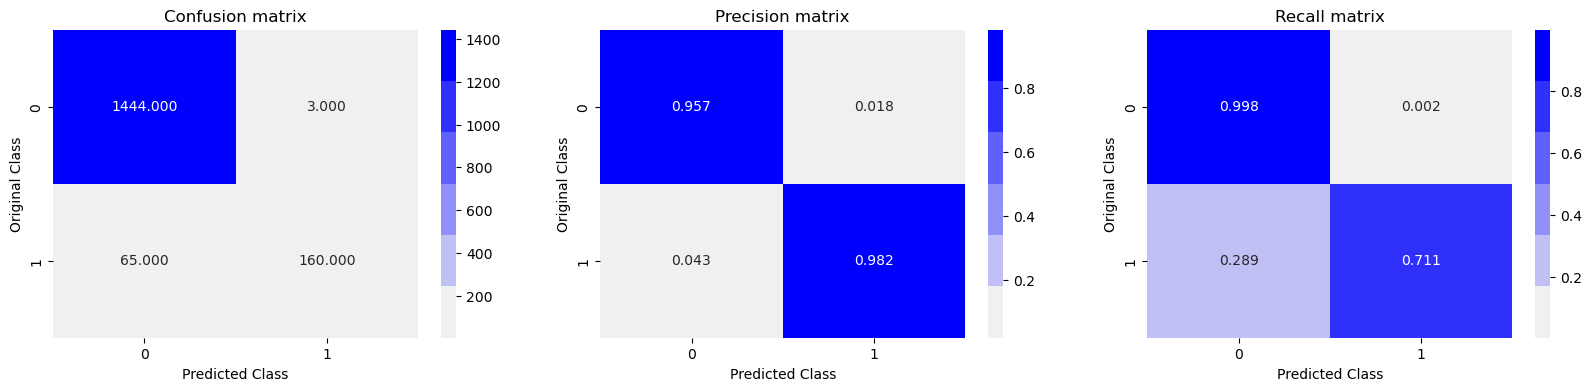

In [139]:
plot_confusion_matrix(y_test, y_pred_lr)

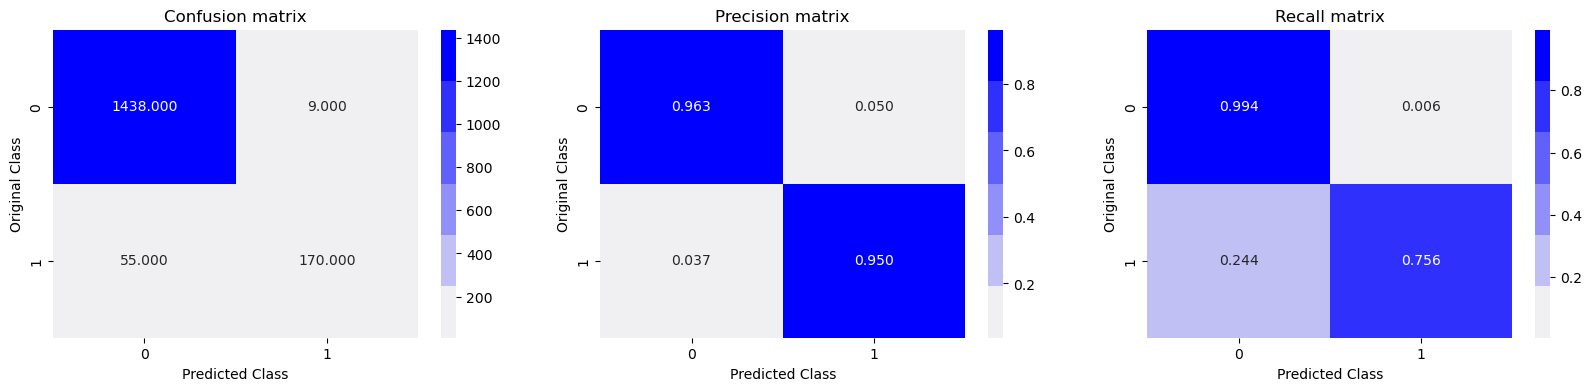

In [140]:
plot_confusion_matrix(y_test, y_pred_xgb)

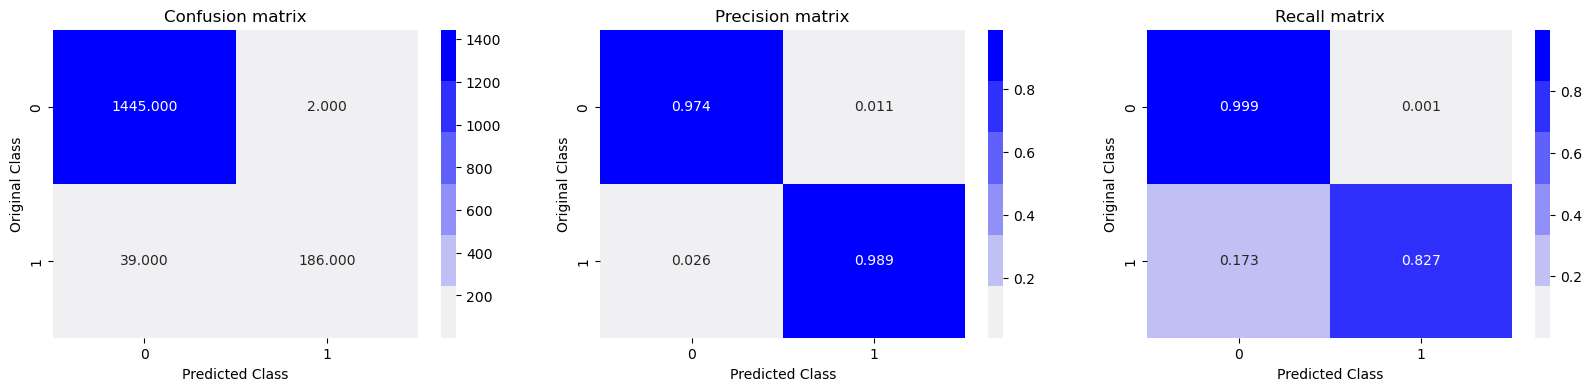

In [141]:
plot_confusion_matrix(y_test, y_pred_svm)

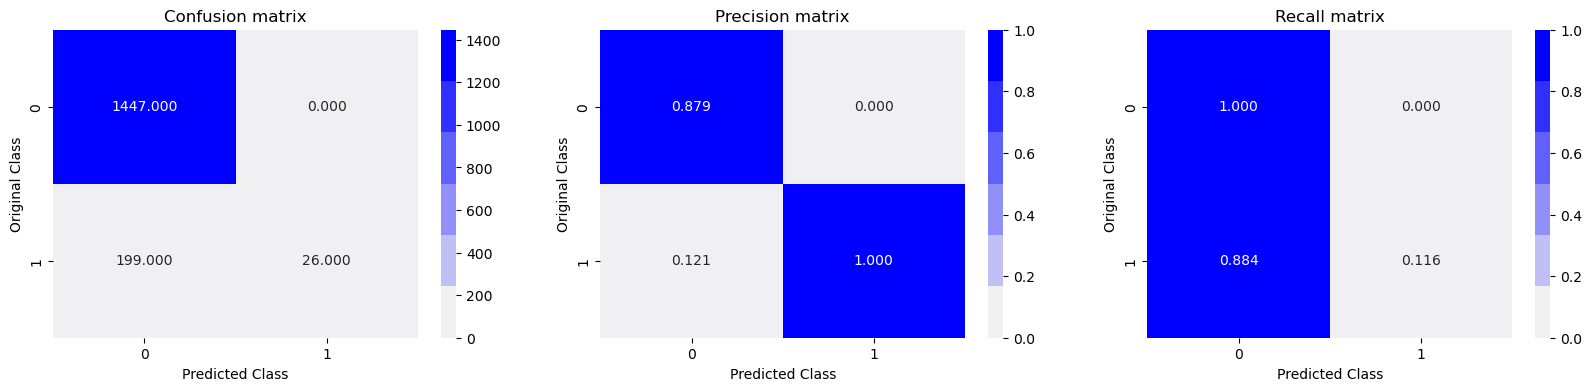

In [142]:
plot_confusion_matrix(y_test, y_pred_rf)

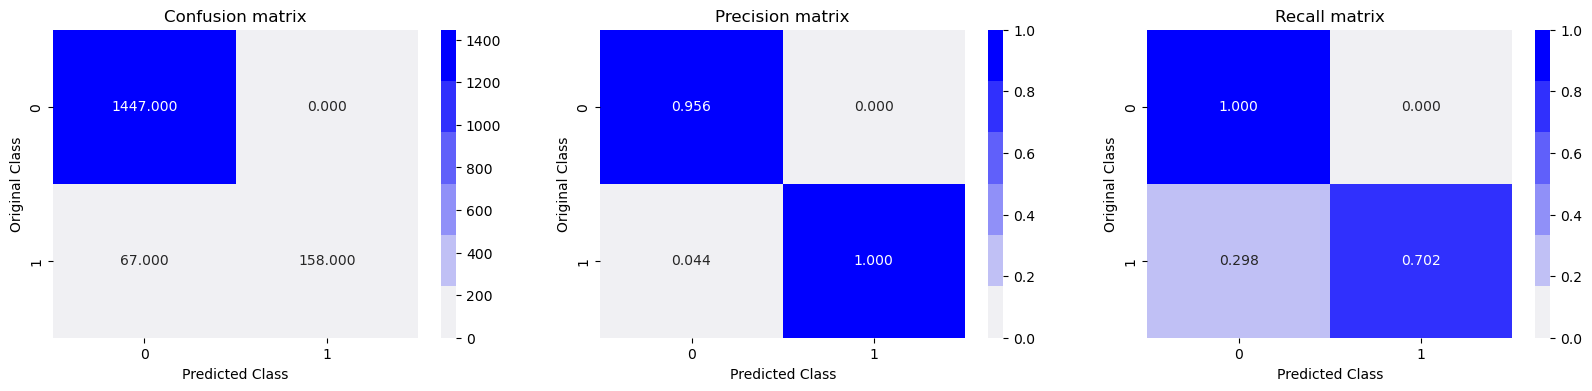

In [143]:
plot_confusion_matrix(y_test, y_pred_nb)

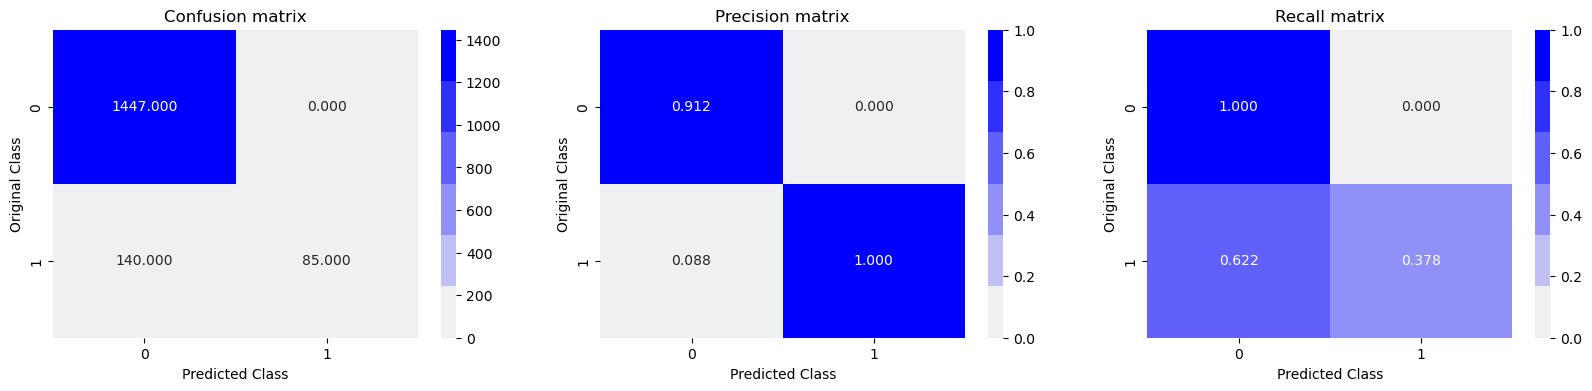

In [144]:
plot_confusion_matrix(y_test, y_pred_knn)

In [145]:
def plot_roc_curve(test_y, predict_y):
    auroc = roc_auc_score(test_y, predict_y)
    print("AUROC Score:- ", auroc)
    fpr, tpr, _ = roc_curve(test_y, predict_y)
    plt.plot(
        fpr, tpr, linestyle="--", label="Prediction_for_lr (AUROC = %0.3f)" % auroc
    )
    plt.title("ROC Plot")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

AUROC Score:-  0.8545189280503724


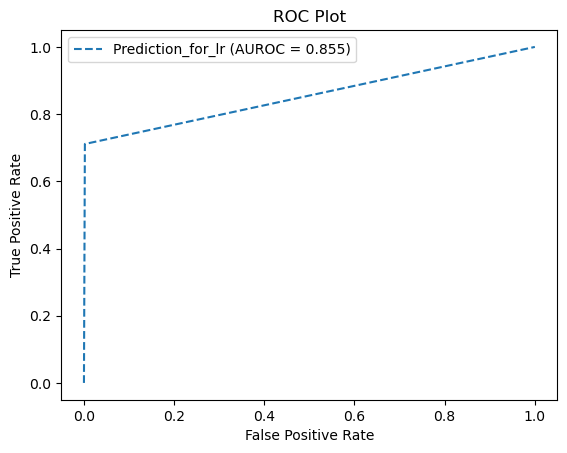

In [146]:
plot_roc_curve(y_test,y_pred_lr)

AUROC Score:-  0.8746678952622284


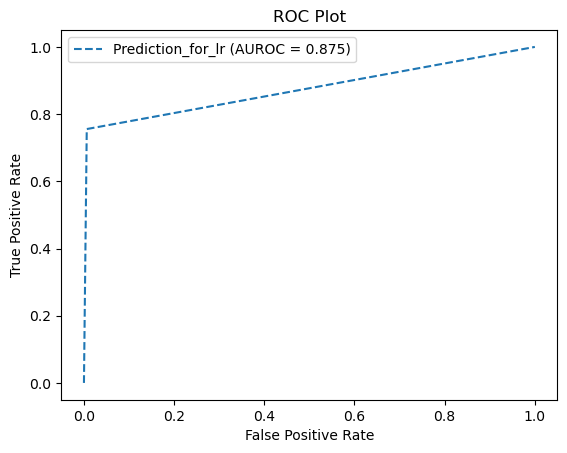

In [147]:
plot_roc_curve(y_test,y_pred_xgb)

AUROC Score:-  0.912642248329878


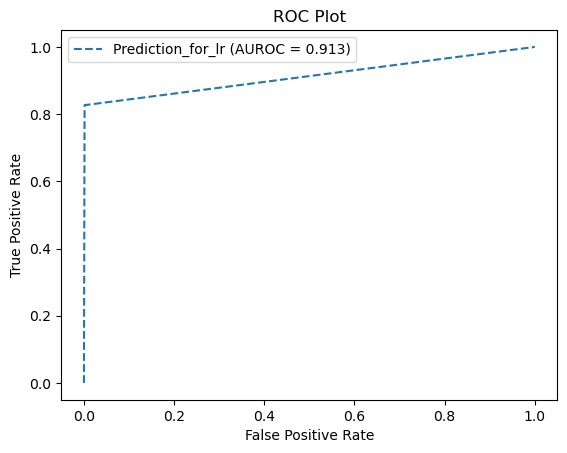

In [148]:
plot_roc_curve(y_test,y_pred_svm)

AUROC Score:-  0.5577777777777778


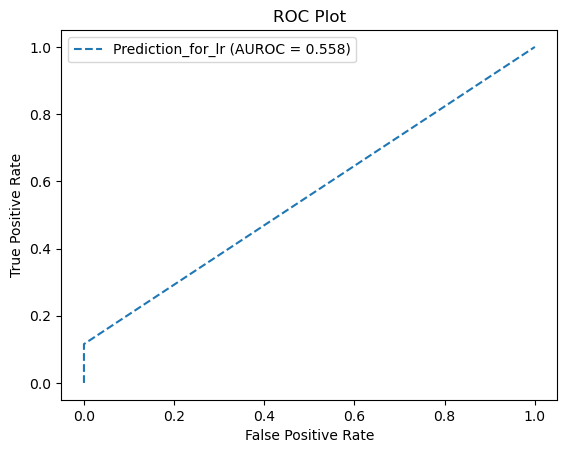

In [149]:
plot_roc_curve(y_test,y_pred_rf)

AUROC Score:-  0.8511111111111112


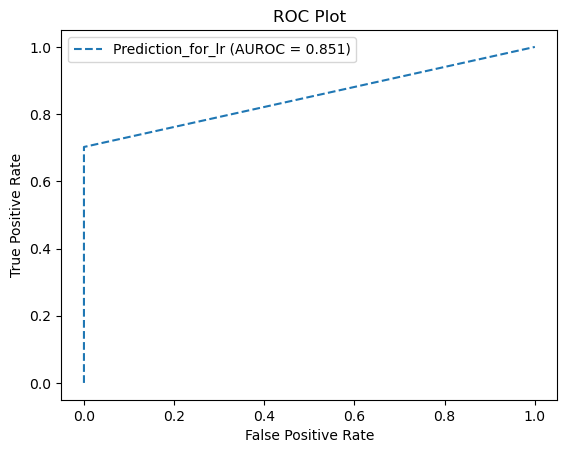

In [150]:
plot_roc_curve(y_test,y_pred_nb)

AUROC Score:-  0.6888888888888889


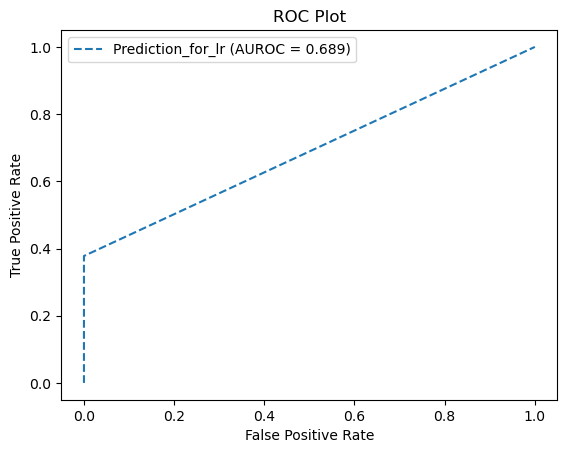

In [151]:
plot_roc_curve(y_test,y_pred_knn)

In [152]:
# Save the model to disk
joblib.dump(lr, "logistic_regression.pkl")

['logistic_regression.pkl']

In [153]:
# Save the model to disk
joblib.dump(xgb, "xgb.pkl")

['xgb.pkl']

In [154]:
# Save the model to disk
joblib.dump(svm, "svm.pkl")

['svm.pkl']

In [159]:
doc = pd.Series('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')
test = vectorizer.transform(doc)  

In [160]:
xgb.predict(test)

array([0])

In [161]:
svm.predict(test)

array([0])